In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
path="final_raw2.csv"

In [3]:
_data=pd.read_csv(path)

In [4]:
_data.head()

,Unnamed: 0,HR,SpO2,NBP_Mean,Temp,RR
0,0,81.0,99.072208,77.69963,35.959407,11.685824
1,1,80.0,99.072208,77.69963,35.959407,11.685824
2,2,80.0,99.072208,77.69963,35.959407,11.685824
3,3,79.0,99.072208,77.69963,35.959407,11.685824
4,4,79.0,99.072208,77.69963,35.959407,11.685824


In [5]:
### Get all the features columns except some signs
features = list(_data.columns)

### Get the features data
data = _data[features]

In [6]:
data

,Unnamed: 0,HR,SpO2,NBP_Mean,Temp,RR
0,0,81.000000,99.072208,77.69963,35.959407,11.685824
1,1,80.000000,99.072208,77.69963,35.959407,11.685824
2,2,80.000000,99.072208,77.69963,35.959407,11.685824
3,3,79.000000,99.072208,77.69963,35.959407,11.685824
4,4,79.000000,99.072208,77.69963,35.959407,11.685824
...,...,...,...,...,...,...
7303,7303,83.998438,100.000000,87.00000,35.959407,8.000000
7304,7304,83.998438,100.000000,87.00000,35.959407,8.000000
7305,7305,83.998438,100.000000,87.00000,35.959407,8.000000
7306,7306,83.998438,100.000000,87.00000,35.959407,8.000000


In [10]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [11]:
data['clusters'] = clustering_kmeans.fit_predict(data)

c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
c:\users\varun siddartha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


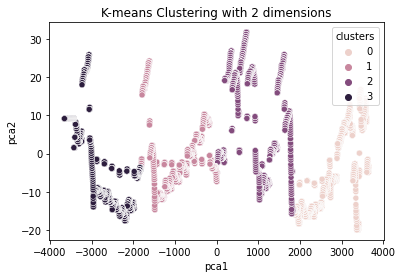

In [22]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [19]:
reduced_data = PCA(n_components=5).fit_transform(data)
reduced_data

array([[ 3.65349601e+03, -3.23719854e+00, -4.21064648e+00,
         3.50681891e+00, -2.04068773e-02],
       [ 3.65249536e+03, -3.79768016e+00, -5.03731500e+00,
         3.53329020e+00, -1.18464066e-02],
       [ 3.65149536e+03, -3.79726195e+00, -5.03685084e+00,
         3.53223901e+00, -1.20172445e-02],
       ...,
       [-3.65149278e+03,  9.17253785e+00, -3.57366637e+00,
        -7.73416761e+00, -1.08754034e+00],
       [-3.65249278e+03,  9.17295606e+00, -3.57320222e+00,
        -7.73521879e+00, -1.08771118e+00],
       [-3.65349278e+03,  9.17337427e+00, -3.57273806e+00,
        -7.73626998e+00, -1.08788201e+00]])

In [18]:
data['clusters']

0       0
1       0
2       0
3       0
4       0
       ..
7303    3
7304    3
7305    3
7306    3
7307    3
Name: clusters, Length: 7308, dtype: int32